# Multi-Class Logistic Regression

In [59]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_curve, auc
import pickle

plt.rcParams["figure.figsize"] = (10,6)  

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

pd.set_option('display.float_format', lambda x: '%.3f' % x)
plt.style.use('classic')

In [60]:
df = pd.read_csv('iris.csv')

In [61]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.100,3.500,1.400,0.200,setosa
1,4.900,3.000,1.400,0.200,setosa
2,4.700,3.200,1.300,0.200,setosa
3,4.600,3.100,1.500,0.200,setosa
4,5.000,3.600,1.400,0.200,setosa


## Exploratory Data Analysis and Visualization

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [63]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.054,0.434,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.759,1.764,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.763,0.100,0.300,1.300,1.800,2.500


In [64]:
df['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

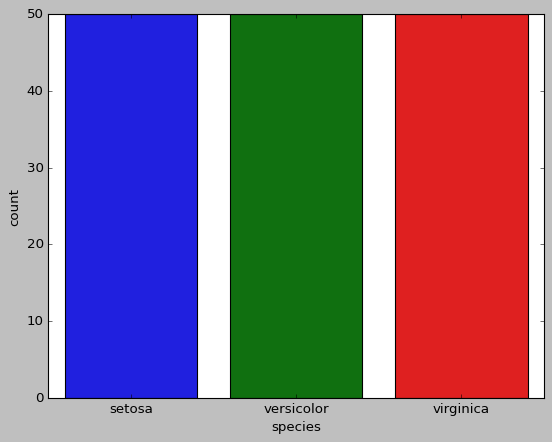

In [65]:
sns.countplot(df['species']);

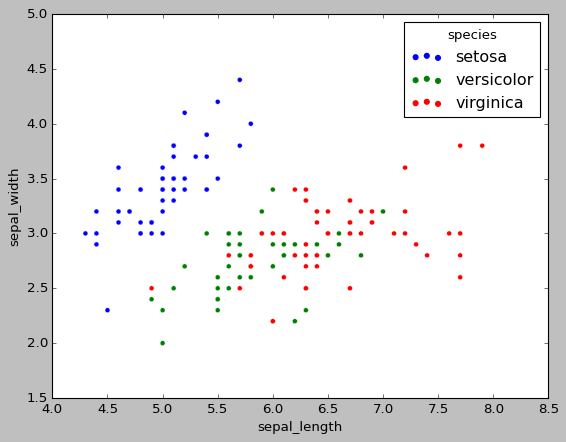

In [66]:
sns.scatterplot(x='sepal_length',y='sepal_width',data=df,hue='species');

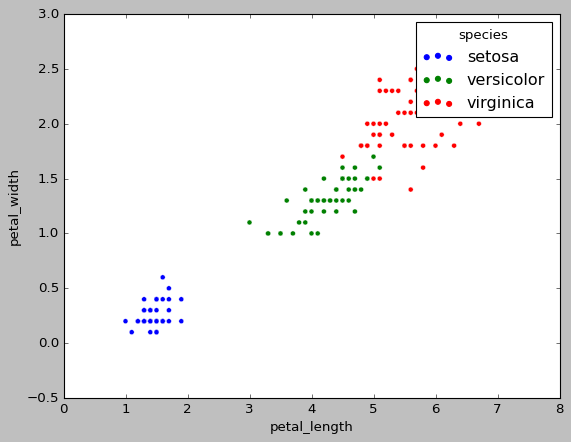

In [67]:
sns.scatterplot(x='petal_length',y='petal_width',data=df,hue='species');

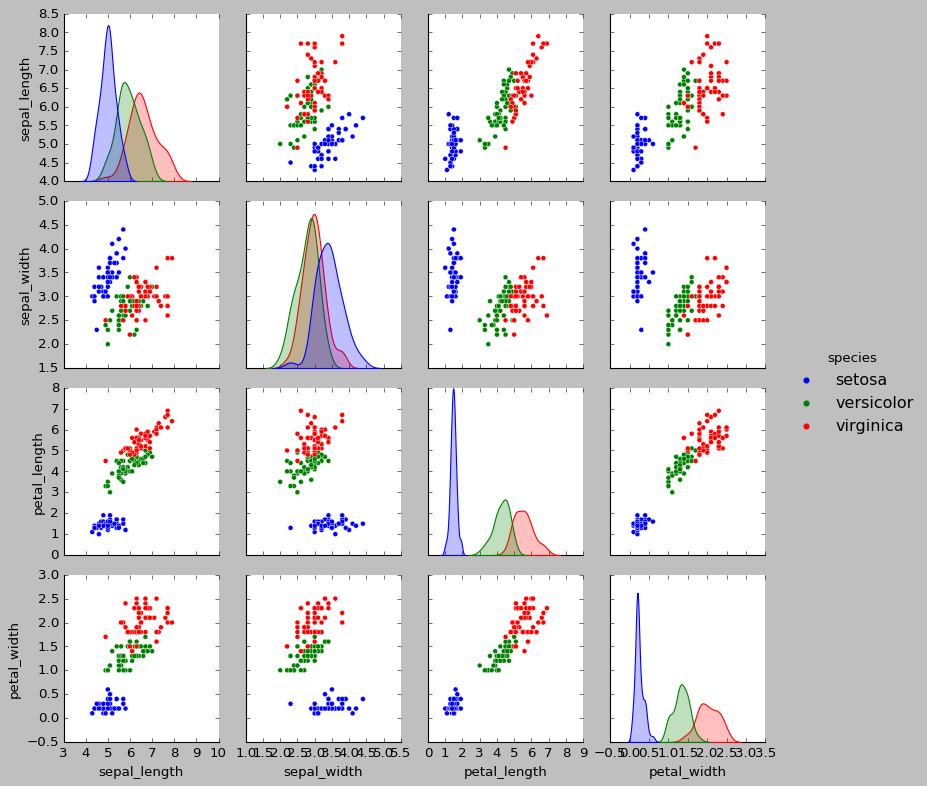

In [68]:
sns.pairplot(df,hue='species');

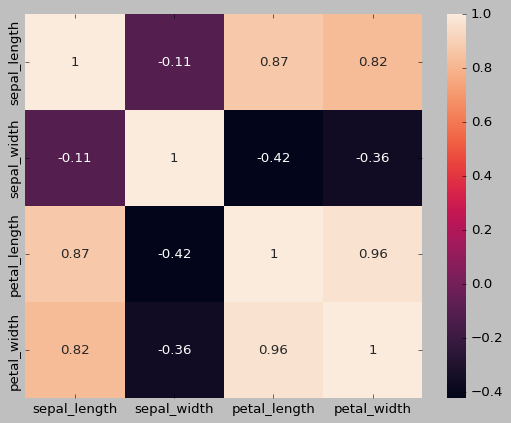

In [69]:
sns.heatmap(df.corr(),annot=True);

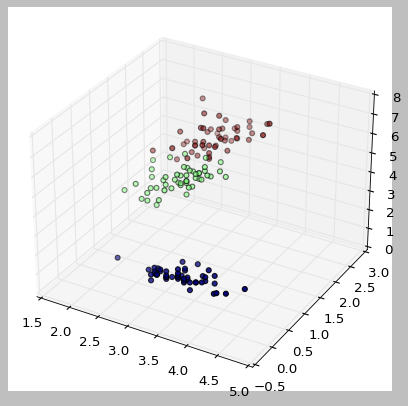

In [70]:
from mpl_toolkits.mplot3d import Axes3D 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
ax.scatter(df['sepal_width'],df['petal_width'],df['petal_length'],c=colors);

In [71]:
import plotly.express as px
colors = df['species'].map({'setosa':0, 'versicolor':1, 'virginica':2})
fig = px.scatter_3d(df, x='sepal_width', y='petal_width', z='petal_length',
              color=colors)
fig.show()

## Train | Test Split and Scaling

In [72]:
X = df.drop('species',axis=1)
y = df['species']

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [75]:
scaler = StandardScaler()

In [76]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Modelling and Model Performance

In [77]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix

### With Default Parameters

In [78]:
log_model = LogisticRegression()

In [79]:
log_model.fit(X_train_scaled,y_train)
y_pred = log_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

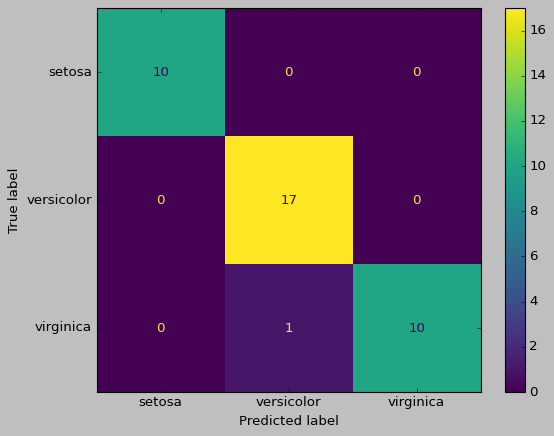

In [80]:
plot_confusion_matrix(log_model, X_test_scaled, y_test)

In [81]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



### Cross Validate

In [82]:
from sklearn.model_selection import cross_validate

In [83]:
model = LogisticRegression()

scores = cross_validate(model,
                        X_train_scaled,
                        y_train,
                        scoring = ['accuracy',
                                   'precision_weighted',
                                   'recall_weighted',
                                   'f1_weighted'],
                        cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy             0.946
test_precision_weighted   0.958
test_recall_weighted      0.946
test_f1_weighted          0.945
dtype: float64

### With Best Parameters (GridsearchCV)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [84]:
log_model = LogisticRegression(solver='saga',multi_class="ovr",max_iter=5000)

In [85]:
penalty = ["l1", "l2", "elasticnet"]
l1_ratio = np.linspace(0, 1, 20)
C = np.logspace(0, 10, 20)

param_grid = {"penalty" : penalty,
             "l1_ratio" : l1_ratio,
             "C" : C}

In [86]:
grid_model = GridSearchCV(log_model, param_grid = param_grid)

In [87]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=5000, multi_class='ovr',
                                          solver='saga'),
             param_grid={'C': array([1.00000000e+00, 3.35981829e+00, 1.12883789e+01, 3.79269019e+01,
       1.27427499e+02, 4.28133240e+02, 1.43844989e+03, 4.83293024e+03,
       1.62377674e+04, 5.45559478e+04, 1.83298071e+05, 6.15848211e+05,
       2.06913808e+06, 6.95192796e+06, 2.33572147e+07, 7.84759970e+07,
       2.63665090e+08, 8.85866790e+08, 2.97635144e+09, 1.00000000e+10]),
                         'l1_ratio': array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ]),
                         'penalty': ['l1', 'l2', 'elasticnet']})

In [88]:
grid_model.best_params_

{'C': 11.28837891684689, 'l1_ratio': 0.0, 'penalty': 'l1'}

In [89]:
y_pred = grid_model.predict(X_test_scaled)
y_pred

array(['setosa', 'setosa', 'setosa', 'virginica', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'virginica', 'setosa',
       'virginica', 'setosa', 'setosa', 'virginica', 'virginica',
       'versicolor', 'versicolor', 'versicolor', 'setosa', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'setosa',
       'virginica', 'versicolor', 'virginica', 'versicolor', 'virginica',
       'versicolor', 'versicolor', 'versicolor'], dtype=object)

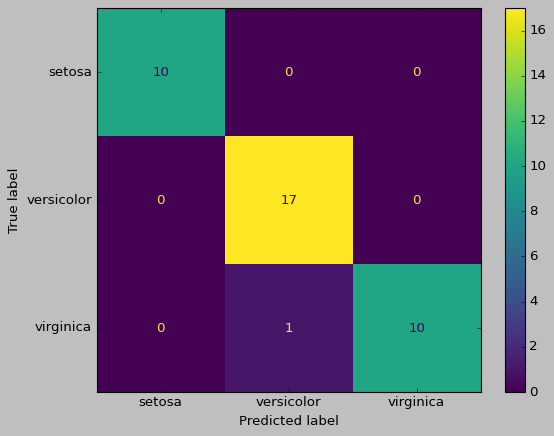

In [90]:
plot_confusion_matrix(grid_model, X_test_scaled, y_test)

In [91]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[10  0  0]
 [ 0 17  0]
 [ 0  1 10]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       0.94      1.00      0.97        17
   virginica       1.00      0.91      0.95        11

    accuracy                           0.97        38
   macro avg       0.98      0.97      0.97        38
weighted avg       0.98      0.97      0.97        38



## ROC (Receiver Operating Curve) and AUC (Area Under Curve)

In [92]:
from sklearn.metrics import plot_roc_curve

In [93]:
plot_roc_curve(grid_model, X_test_scaled, y_test);

ValueError: GridSearchCV should be a binary classifier

https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html

For Multiclass

In [94]:
from sklearn.metrics import roc_curve, auc

In [95]:
def plot_multiclass_roc(clf, X_test, y_test, n_classes, figsize=(5,5)):
    y_score = clf.decision_function(X_test)

    # structures
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    # calculate dummies once
    y_test_dummies = pd.get_dummies(y_test, drop_first=False).values
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_dummies[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # roc for each class
    fig, ax = plt.subplots(figsize=figsize)
    ax.plot([0, 1], [0, 1], 'k--')
    ax.set_xlim([0.0, 1.0])
    ax.set_ylim([0.0, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver operating characteristic example')
    for i in range(n_classes):
        ax.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f) for label %i' % (roc_auc[i], i))
    ax.legend(loc="best")
    ax.grid(alpha=.4)
    sns.despine()
    plt.show()

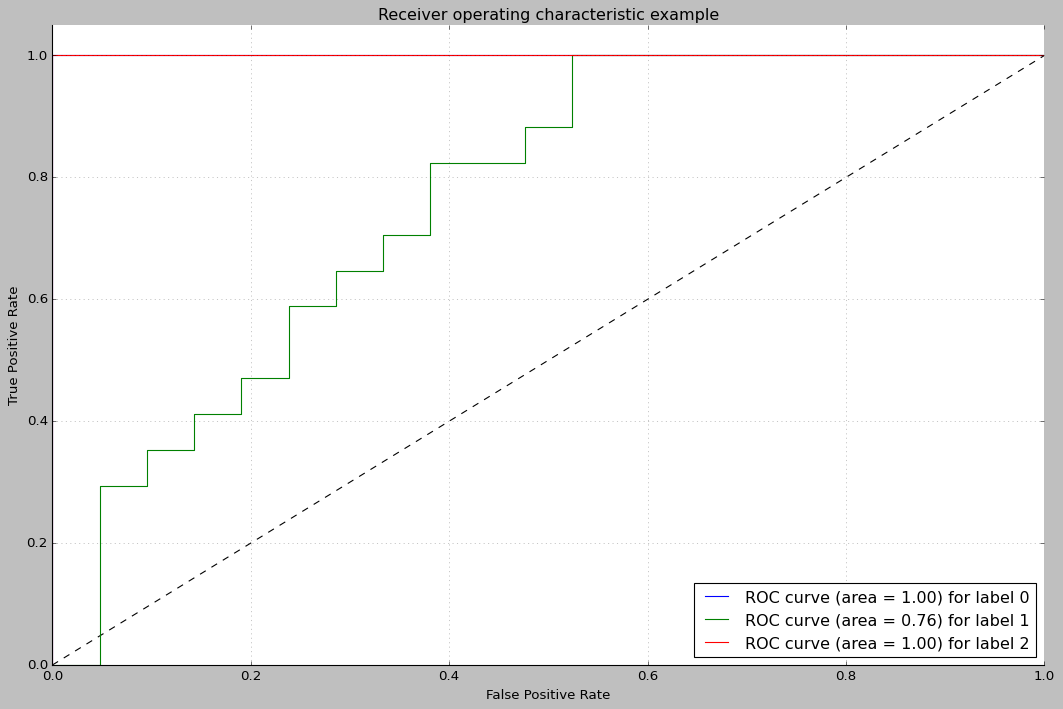

In [96]:
plot_multiclass_roc(grid_model, X_test_scaled, y_test, n_classes=3, figsize=(16, 10))

## Final Model and Model Deployment

In [97]:
scaler = StandardScaler().fit(X)

In [98]:
import pickle
pickle.dump(scaler, open("scaler_iris", 'wb'))

In [99]:
X_scaled = scaler.transform(X)

In [100]:
final_model = LogisticRegression().fit(X_scaled, y)

In [101]:
pickle.dump(final_model, open("final_model_iris", 'wb'))

In [102]:
X.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.000,5.843,0.828,4.300,5.100,5.800,6.400,7.900
sepal_width,150.000,3.054,0.434,2.000,2.800,3.000,3.300,4.400
petal_length,150.000,3.759,1.764,1.000,1.600,4.350,5.100,6.900
petal_width,150.000,1.199,0.763,0.100,0.300,1.300,1.800,2.500


In [103]:
my_dict = {"sepal_length": [4.5, 5.8, 7.5],
           "sepal_width": [2.2, 3, 4.2],
           "petal_length": [1.3, 4.3, 6.5],
           "petal_width": [0.2, 1.3, 2.3]
          }

In [104]:
sample = pd.DataFrame(my_dict)
sample

,sepal_length,sepal_width,petal_length,petal_width
0,4.500,2.200,1.300,0.200
1,5.800,3.000,4.300,1.300
2,7.500,4.200,6.500,2.300


In [105]:
scaler_iris = pickle.load(open("scaler_iris", "rb"))

In [106]:
sample_scaled = scaler_iris.transform(sample)
sample_scaled

array([[-1.62768839, -1.97618132, -1.39813811, -1.31297673],
       [-0.05250608, -0.1249576 ,  0.30783301,  0.13322594],
       [ 2.00734772,  2.65187798,  1.5588785 ,  1.44795564]])

In [107]:
final_model = pickle.load(open("final_model_iris", "rb"))

In [108]:
predictions = final_model.predict(sample_scaled)
predictions_proba = final_model.predict_proba(sample_scaled)

In [109]:
sample["pred"] = predictions
sample["pred_proba_setosa"] = predictions_proba[:,0]
sample["pred_proba_versicolor"] = predictions_proba[:,1]
sample["pred_proba_virginica"] = predictions_proba[:,2]
sample

,sepal_length,sepal_width,petal_length,petal_width,pred,pred_proba_setosa,pred_proba_versicolor,pred_proba_virginica
0,4.500,2.200,1.300,0.200,setosa,0.716,0.284,0.000
1,5.800,3.000,4.300,1.300,versicolor,0.044,0.890,0.066
2,7.500,4.200,6.500,2.300,virginica,0.000,0.021,0.979
